In [1]:
%pip install catboost

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: C:\Users\HP\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
# Import library atas algoritma / metode klasifikasi yang digunakan
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import BernoulliNB, GaussianNB, MultinomialNB
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.ensemble import HistGradientBoostingClassifier, GradientBoostingClassifier
from catboost import CatBoostClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.mixture import GaussianMixture
from sklearn.semi_supervised import LabelPropagation, LabelSpreading
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report
import sklearn.model_selection as skm
from sklearn.metrics import confusion_matrix
from ISLP import load_data, confusion_table
from matplotlib.pyplot import subplots, cm
from ISLP.svm import plot as plot_svm
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_curve, RocCurveDisplay

In [3]:
train = pd.read_csv("C:/Users/HP/Downloads/train.csv")
test = pd.read_csv("C:/Users/HP/Downloads/test.csv")

In [4]:
train.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


In [5]:
test.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage
0,381110,Male,25,1,11.0,1,< 1 Year,No,35786.0,152.0,53
1,381111,Male,40,1,28.0,0,1-2 Year,Yes,33762.0,7.0,111
2,381112,Male,47,1,28.0,0,1-2 Year,Yes,40050.0,124.0,199
3,381113,Male,24,1,27.0,1,< 1 Year,Yes,37356.0,152.0,187
4,381114,Male,27,1,28.0,1,< 1 Year,No,59097.0,152.0,297


In [6]:
print("Train shape:", train.shape)
print("Test shape:", test.shape)


Train shape: (381109, 12)
Test shape: (127037, 11)


### EDA

#### 1. Visualisasi Barchart dalam Melihat Hubungan Status Kepemilikan Asuransi Sebelumnya dengan Ketertarikan Membeli Asuransi Kendaraan

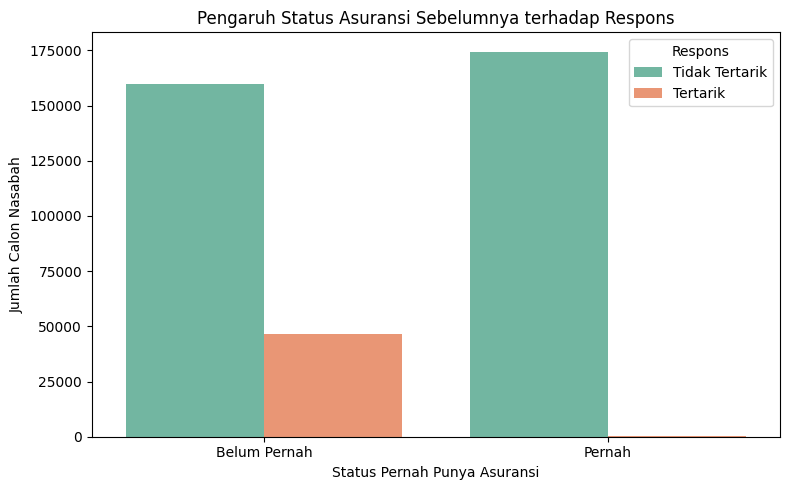

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Hitung jumlah data berdasarkan Previously_Insured dan Response
count_data = train.groupby(['Previously_Insured', 'Response']).size().reset_index(name='Count')

# Ubah nilai menjadi label agar lebih mudah dibaca
count_data['Previously_Insured'] = count_data['Previously_Insured'].map({0: 'Belum Pernah', 1: 'Pernah'})
count_data['Response'] = count_data['Response'].map({0: 'Tidak Tertarik', 1: 'Tertarik'})

# Buat plot
plt.figure(figsize=(8, 5))
sns.barplot(data=count_data, x='Previously_Insured', y='Count', hue='Response', palette='Set2')

# Tambahkan label dan judul
plt.title('Pengaruh Status Asuransi Sebelumnya terhadap Respons')
plt.xlabel('Status Pernah Punya Asuransi')
plt.ylabel('Jumlah Calon Nasabah')
plt.legend(title='Respons')
plt.tight_layout()
plt.show()


C:\Users\HP\AppData\Local\Temp\ipykernel_37168\775738864.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=train, x='Response', y='Annual_Premium', palette='Set2')


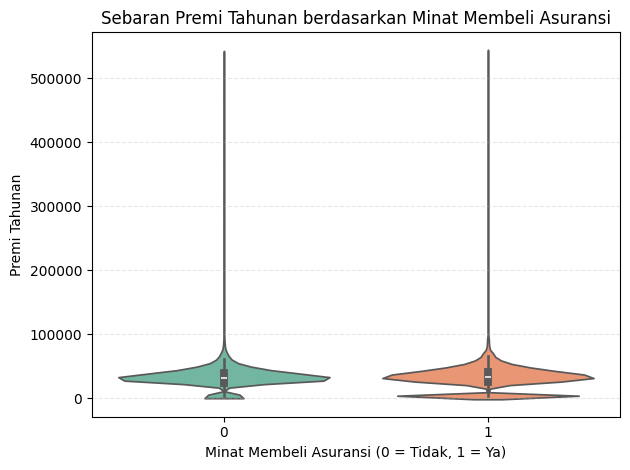

In [8]:
sns.violinplot(data=train, x='Response', y='Annual_Premium', palette='Set2')
plt.title('Sebaran Premi Tahunan berdasarkan Minat Membeli Asuransi')
plt.xlabel('Minat Membeli Asuransi (0 = Tidak, 1 = Ya)')
plt.ylabel('Premi Tahunan')
plt.grid(True, axis='y', linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()


In [9]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   Gender                381109 non-null  object 
 2   Age                   381109 non-null  int64  
 3   Driving_License       381109 non-null  int64  
 4   Region_Code           381109 non-null  float64
 5   Previously_Insured    381109 non-null  int64  
 6   Vehicle_Age           381109 non-null  object 
 7   Vehicle_Damage        381109 non-null  object 
 8   Annual_Premium        381109 non-null  float64
 9   Policy_Sales_Channel  381109 non-null  float64
 10  Vintage               381109 non-null  int64  
 11  Response              381109 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 34.9+ MB


In [10]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 127037 entries, 0 to 127036
Data columns (total 11 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    127037 non-null  int64  
 1   Gender                127037 non-null  object 
 2   Age                   127037 non-null  int64  
 3   Driving_License       127037 non-null  int64  
 4   Region_Code           127037 non-null  float64
 5   Previously_Insured    127037 non-null  int64  
 6   Vehicle_Age           127037 non-null  object 
 7   Vehicle_Damage        127037 non-null  object 
 8   Annual_Premium        127037 non-null  float64
 9   Policy_Sales_Channel  127037 non-null  float64
 10  Vintage               127037 non-null  int64  
dtypes: float64(3), int64(5), object(3)
memory usage: 10.7+ MB


In [11]:
# Pilih variabel X yang sudah dalam bentuk angka
X_categoric = train[['Gender','Previously_Insured','Vehicle_Age',
                     'Vehicle_Damage','Response','Driving_License']]
# Pilih variabel X yang masih bukan angka
X_numeric = train[['Age','Annual_Premium','Vintage']]

# Pilih variabel Y
y = train['Response']


In [12]:
X_numeric

,Age,Annual_Premium,Vintage
0,44,40454.0,217
1,76,33536.0,183
2,47,38294.0,27
3,21,28619.0,203
4,29,27496.0,39
...,...,...,...
381104,74,30170.0,88
381105,30,40016.0,131
381106,21,35118.0,161
381107,68,44617.0,74


In [13]:
X_categoric

,Gender,Previously_Insured,Vehicle_Age,Vehicle_Damage,Response,Driving_License
0,Male,0,> 2 Years,Yes,1,1
1,Male,0,1-2 Year,No,0,1
2,Male,0,> 2 Years,Yes,1,1
3,Male,1,< 1 Year,No,0,1
4,Female,1,< 1 Year,No,0,1
...,...,...,...,...,...,...
381104,Male,1,1-2 Year,No,0,1
381105,Male,1,< 1 Year,No,0,1
381106,Male,1,< 1 Year,No,0,1
381107,Female,0,> 2 Years,Yes,0,1


In [14]:
X_numeric.isna().sum()

Age               0
Annual_Premium    0
Vintage           0
dtype: int64

In [15]:
X_categoric.isna().sum()

Gender                0
Previously_Insured    0
Vehicle_Age           0
Vehicle_Damage        0
Response              0
Driving_License       0
dtype: int64

In [16]:
data_features = pd.concat([X_numeric,X_categoric],axis=1)
data_features['Region_Code'] = train['Region_Code']
data_features['Policy_Sales_Channel'] = train['Policy_Sales_Channel']
data_features

,Age,Annual_Premium,Vintage,Gender,Previously_Insured,Vehicle_Age,Vehicle_Damage,Response,Driving_License,Region_Code,Policy_Sales_Channel
0,44,40454.0,217,Male,0,> 2 Years,Yes,1,1,28.0,26.0
1,76,33536.0,183,Male,0,1-2 Year,No,0,1,3.0,26.0
2,47,38294.0,27,Male,0,> 2 Years,Yes,1,1,28.0,26.0
3,21,28619.0,203,Male,1,< 1 Year,No,0,1,11.0,152.0
4,29,27496.0,39,Female,1,< 1 Year,No,0,1,41.0,152.0
...,...,...,...,...,...,...,...,...,...,...,...
381104,74,30170.0,88,Male,1,1-2 Year,No,0,1,26.0,26.0
381105,30,40016.0,131,Male,1,< 1 Year,No,0,1,37.0,152.0
381106,21,35118.0,161,Male,1,< 1 Year,No,0,1,30.0,160.0
381107,68,44617.0,74,Female,0,> 2 Years,Yes,0,1,14.0,124.0


In [17]:
X_encode = X_categoric.apply(LabelEncoder().fit_transform)
X_encode

,Gender,Previously_Insured,Vehicle_Age,Vehicle_Damage,Response,Driving_License
0,1,0,2,1,1,1
1,1,0,0,0,0,1
2,1,0,2,1,1,1
3,1,1,1,0,0,1
4,0,1,1,0,0,1
...,...,...,...,...,...,...
381104,1,1,0,0,0,1
381105,1,1,1,0,0,1
381106,1,1,1,0,0,1
381107,0,0,2,1,0,1


In [18]:
X_encode.isna().sum()

Gender                0
Previously_Insured    0
Vehicle_Age           0
Vehicle_Damage        0
Response              0
Driving_License       0
dtype: int64

In [19]:
X = pd.concat([X_numeric, X_encode], axis = 1)
X

,Age,Annual_Premium,Vintage,Gender,Previously_Insured,Vehicle_Age,Vehicle_Damage,Response,Driving_License
0,44,40454.0,217,1,0,2,1,1,1
1,76,33536.0,183,1,0,0,0,0,1
2,47,38294.0,27,1,0,2,1,1,1
3,21,28619.0,203,1,1,1,0,0,1
4,29,27496.0,39,0,1,1,0,0,1
...,...,...,...,...,...,...,...,...,...
381104,74,30170.0,88,1,1,0,0,0,1
381105,30,40016.0,131,1,1,1,0,0,1
381106,21,35118.0,161,1,1,1,0,0,1
381107,68,44617.0,74,0,0,2,1,0,1


#### Data Test

In [20]:
test.duplicated().sum()

0

In [21]:
# Pilih variabel X yang sudah dalam bentuk angka
X_categoric_test = test[['Gender','Previously_Insured','Vehicle_Age',
                     'Vehicle_Damage','Driving_License']]
# Pilih variabel X yang masih bukan angka
X_numeric_test = test[['Age','Annual_Premium','Vintage']]
#Gabungkan variabel X
X_test = pd.concat([X_numeric_test, X_categoric_test], axis=1)


In [22]:
X_test.isna().sum()

Age                   0
Annual_Premium        0
Vintage               0
Gender                0
Previously_Insured    0
Vehicle_Age           0
Vehicle_Damage        0
Driving_License       0
dtype: int64

In [23]:
data_features_test = pd.concat([X_numeric_test, X_categoric_test], axis=1)
data_features_test['Region_Code'] = test['Region_Code']
data_features_test['Policy_Sales_Channel'] = test['Policy_Sales_Channel']
X_test_encode = X_categoric_test.apply(LabelEncoder().fit_transform)
Xtest = pd.concat([X_numeric_test, X_test_encode], axis=1)
Xtest

,Age,Annual_Premium,Vintage,Gender,Previously_Insured,Vehicle_Age,Vehicle_Damage,Driving_License
0,25,35786.0,53,1,1,1,0,1
1,40,33762.0,111,1,0,0,1,1
2,47,40050.0,199,1,0,0,1,1
3,24,37356.0,187,1,1,1,1,1
4,27,59097.0,297,1,1,1,0,1
...,...,...,...,...,...,...,...,...
127032,26,30867.0,56,0,1,1,0,1
127033,38,28700.0,165,0,0,0,1,1
127034,21,29802.0,74,1,1,1,0,1
127035,71,62875.0,265,1,1,0,0,1


In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [25]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [26]:
svm_linear = SVC(C=10, kernel='linear')
svm_linear.fit(X_train_scaled, y_train)

SVC(C=10, kernel='linear')

Melakukan hyperparameter tunning pada parameter C

In [28]:
kfold = skm.KFold(5,
                  random_state=0,
                  shuffle=True)
grid_linear = skm.GridSearchCV(svm_linear,
                        {'C':[0.001,0.01,0.1,1,5,10,100]},
                        refit=True,
                        cv=kfold,
                        scoring='accuracy')
grid_linear.fit(X_train_scaled, y_train)
gridlinear.best_params_

{'C': 0.001}

In [ ]:
import pandas as pd

# Buat DataFrame dari hasil GridSearchCV
results = pd.DataFrame(grid_linear.cv_results_)

# Ambil kolom parameter C dan nilai rata-rata akurasi dari cross-validation
hasil_linear = results[['param_C', 'mean_test_score']]

# Tampilkan hasil
print(hasil_linear.sort_values(by='mean_test_score', ascending=False))



   param_C  mean_test_score  std_test_score
0    0.001              1.0             0.0
1    0.010              1.0             0.0
2    0.100              1.0             0.0
3    1.000              1.0             0.0
4    5.000              1.0             0.0
5   10.000              1.0             0.0
6  100.000              1.0             0.0


In [29]:
svm_ = SVC(C=0.001, kernel='linear').fit(X_train_scaled, y_train)
y_hat = svm_.predict(X_train_scaled)
confusion_table(y_train, y_hat)


Truth,0,1
Predicted,,
0,267700,0
1,0,37187


In [33]:
y_pred_linear = svm_linear.predict(X_test_scaled)

In [34]:
print(classification_report(y_test, y_pred_linear))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     66699
           1       1.00      1.00      1.00      9523

    accuracy                           1.00     76222
   macro avg       1.00      1.00      1.00     76222
weighted avg       1.00      1.00      1.00     76222



In [30]:
svm_ = SVC(C=0.001, kernel='linear').fit(X_test_scaled, y_train)
y_hat = svm_.predict(X_test_scaled)
confusion_table(y_train, y_hat)


ValueError: Found input variables with inconsistent numbers of samples: [76222, 304887]

Pake kernel non linear

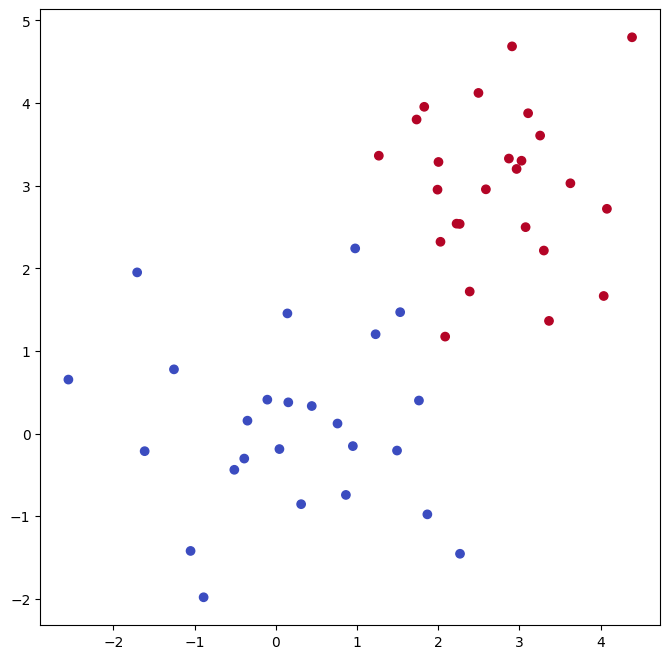

In [ ]:
fig, ax = subplots(figsize=(8,8))
ax.scatter(X[:,0],
           X[:,1],
           c=y,
           cmap=cm.coolwarm);

Pemodelan SVR akan digunakan fungsi kernel Radial Basis Function (rbf)

In [31]:
svm_rbf = SVC(kernel="rbf", gamma=0.5, C=0.001)
svm_rbf.fit(X_train_scaled, y_train)

SVC(C=0.001, gamma=0.5)

In [32]:
y_pred = svm_rbf.predict(X_test_scaled)


In [37]:
# Evaluasi
print("=== Linear SVM ===")
print("Accuracy:", accuracy_score(y_test, y_pred_linear))
print(classification_report(y_test, y_pred_linear))

print("\n=== RBF SVM ===")
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

=== Linear SVM ===
Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     66699
           1       1.00      1.00      1.00      9523

    accuracy                           1.00     76222
   macro avg       1.00      1.00      1.00     76222
weighted avg       1.00      1.00      1.00     76222


=== RBF SVM ===
Accuracy: 0.9844926661593766
              precision    recall  f1-score   support

           0       0.98      1.00      0.99     66699
           1       1.00      0.88      0.93      9523

    accuracy                           0.98     76222
   macro avg       0.99      0.94      0.96     76222
weighted avg       0.98      0.98      0.98     76222



In [38]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


In [39]:
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train_scaled, y_train)


In [ ]:
svm_rbf = SVC(kernel='rbf', gamma=0.5, C=0.001)
svm_rbf.fit(X_resampled, y_resampled)


In [ ]:
y_pred = svm_rbf.predict(X_test_scaled)

print("Accuracy:", accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


Truth,-1,1
Predicted,,
-1,10,3
1,0,12


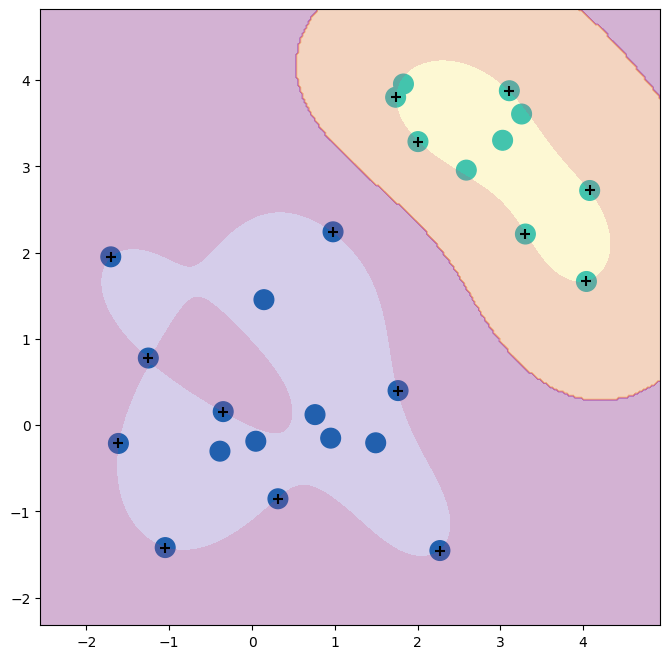

In [ ]:
from sklearn.decomposition import PCA

# Reduksi dimensi ke 2 komponen utama
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# Fit ulang model terbaik di data 2 dimensi
best_svm = grid.best_estimator_
best_svm.fit(X_train_pca, y_train)

# Plot dengan data PCA
fig, ax = subplots(figsize=(8,8))
plot_svm(X_train_pca, y_train, best_svm, ax=ax)
# Prediksi dan evaluasi di data asli (bukan PCA)
y_hat_test = best_svm.predict(X_test_scaled)
confusion_table(y_hat_test, y_test)


In [ ]:
svm_poly = SVC(kernel='poly')
svm_poly.fit(X_train_scaled, y_train)

y_pred_poly = svm_poly.predict(X_train_scaled)

cm_poly = confusion_matrix(y_train, y_pred_poly)
print(cm_poly)


In [ ]:
# Tentukan parameter grid
param_grid_poly = {
    'C': [0.1, 1, 10],
    'degree': [2, 3, 4],       # derajat polinomial
    'gamma': ['scale', 'auto']
}
kfold = KFold(n_splits=5, shuffle=True, random_state=0)
# Grid Search
grid_poly = GridSearchCV(estimator=svm_poly,
                         param_grid=param_grid_poly,
                         cv=kfold,
                         scoring='accuracy')

# Training dengan data training yang sudah diskalakan
grid_poly.fit(X_train_scaled, y_train)

# Tampilkan parameter terbaik
print("Best Params:", grid_poly.best_params_)


In [ ]:
# Linear kernel
acc_linear = cross_val_score(svm_linear, X_train_scaled, y_train, cv=5).mean()

# RBF kernel
acc_rbf = cross_val_score(svm_rbf, X_train_scaled, y_train, cv=5).mean()

In [ ]:
print(f"Akurasi Linear SVM: {acc_linear:.3f}")
print(f"Akurasi RBF SVM: {acc_rbf:.3f}")

Akurasi Linear SVM: 0.980
Akurasi RBF SVM: 0.960


Terlihat akurasi lebih tinggi pada kernel linear sehingga model yang dipakai yang linear

In [ ]:
svm_

SVC(C=1, kernel='linear')

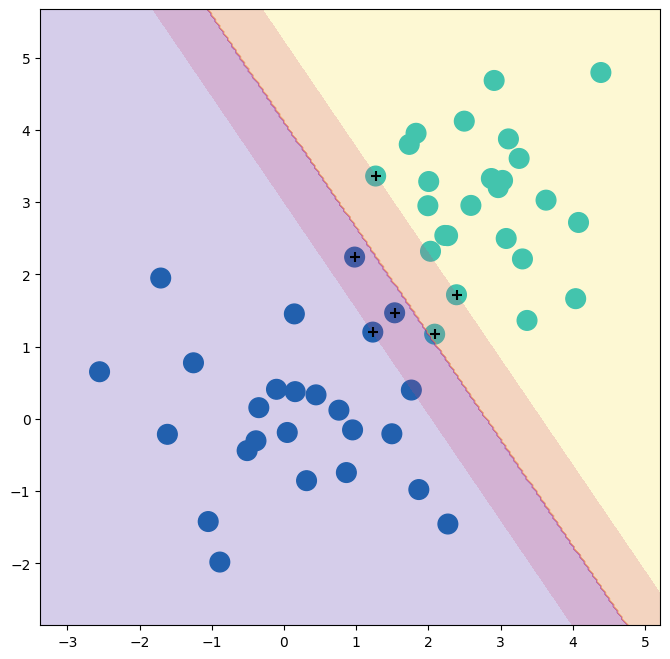

In [ ]:
fig, ax = subplots(figsize=(8,8))
plot_svm(X,
         y,
         svm_,
         ax=ax)

In [ ]:
kfold = skm.KFold(5,
                  random_state=0,
                  shuffle=True)
grid = skm.GridSearchCV(svm_linear,
                        {'C':[0.001,0.01,0.1,1,5,10,100]},
                        refit=True,
                        cv=kfold,
                        scoring='accuracy')
grid.fit(X_train, y_train)
print(grid.best_params_)

{'C': 1}


In [ ]:
# Train ulang dengan parameter terbaik
best_svmLinear = grid.best_estimator_
# Prediksi di test set
y_pred = best_svmLinear.predict(X_test)

# Evaluasi
print(classification_report(y_test, y_pred))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion matrix:\n", cm)

              precision    recall  f1-score   support

          -1       1.00      1.00      1.00         4
           1       1.00      1.00      1.00         6

    accuracy                           1.00        10
   macro avg       1.00      1.00      1.00        10
weighted avg       1.00      1.00      1.00        10

Confusion matrix:
 [[4 0]
 [0 6]]


Truth,-1,1
Predicted,,
-1,4,0
1,0,6


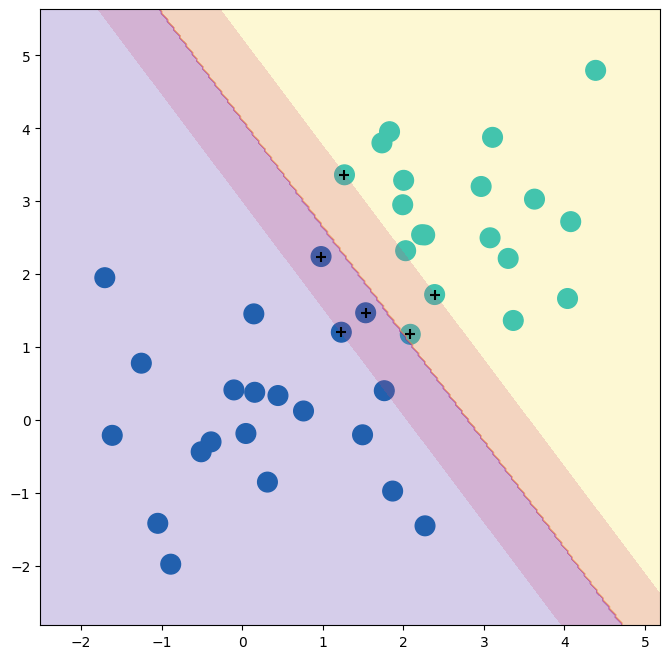

In [ ]:
best_svmLinear = grid.best_estimator_
fig, ax = plt.subplots(figsize=(8,8))
plot_svm(X_train,
         y_train,
         best_svmLinear,
         ax=ax)

y_hat_test = best_svmLinear.predict(X_test)
confusion_table(y_hat_test, y_test)

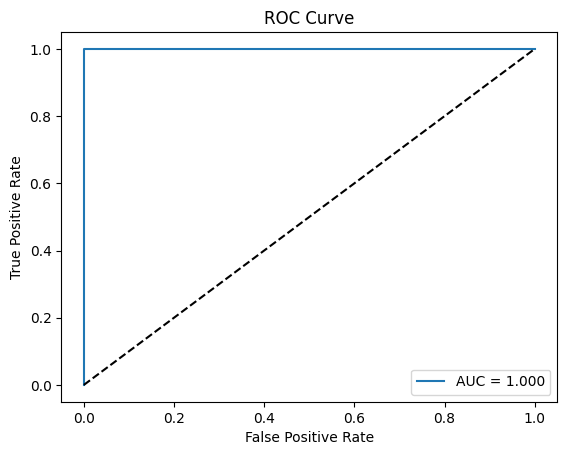

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score

# Pastikan model sudah fit dengan probability=True kalau mau predict_proba
y_prob = best_svmLinear.decision_function(X_test)  # buat SVM, decision_function dipakai untuk ROC

